1. output: 'mapping_PDalpha.txt'(mapping file with PD alpha diversity)
2. scatterplots of PD alpha diversity vs. 5 vitaminD measurements (output: 'vitamin_pd.txt' (5 VitD variables with PD)
3. linear regression of PD alpha diversity vs. 5 vitaminD measurements & diagnostic plots and tests
4. effect size analysis of alpha diversity with medata (see notebook R_alpha_RDA)

reference on statsmodel ols and disagnostic plots
http://mpastell.com/pweave/_downloads/linear_regression.html (visualization)
http://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html (tests)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/serene/miniconda3/envs/gneiss_v2/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## I. prepare mapping_PDalpha file

### calculate average PD alpha diversity at highest rarefaction 5870

In [2]:
alpha = pd.read_csv('../data/PD_whole_tree.txt', sep='\t')

In [3]:
alpha.tail(10)

,Unnamed: 0,sequences per sample,iteration,SD8637,PO7016,MN1789,MN1868,PA3814,MN2006,PA3070,...,PI4544,BI0445,PO7138,BI0215,MN2452,BI0704,PO7442,MN2439,SD8458,PI4831
100,alpha_rarefaction_5870_0.txt,5870,0,15.75587,13.32326,20.44849,19.84739,23.18831,22.89172,10.97722,...,17.06109,8.70005,20.21180,15.14925,20.24193,18.10936,13.24216,12.39128,20.51470,13.60442
101,alpha_rarefaction_5870_1.txt,5870,1,16.84385,13.66343,19.87174,19.08975,23.06850,23.27983,10.45496,...,17.83850,8.77648,18.93974,15.34710,20.44643,17.70311,12.79435,12.40482,21.29006,13.43003
102,alpha_rarefaction_5870_2.txt,5870,2,16.83551,13.10052,19.77507,19.98490,22.27577,23.93320,10.64706,...,17.80205,8.69184,19.55050,15.10865,20.37949,18.22299,13.30310,11.63605,20.45430,13.75714
103,alpha_rarefaction_5870_3.txt,5870,3,17.01391,13.60641,20.94002,20.31355,22.29525,23.49255,10.87460,...,17.67976,8.60897,19.87384,15.59344,20.82964,17.66770,13.71284,11.98228,20.97530,13.11811
104,alpha_rarefaction_5870_4.txt,5870,4,15.23422,13.35253,21.66715,19.84968,22.99364,23.37404,10.24237,...,17.64535,8.61127,18.96962,14.96346,20.11946,18.40578,13.48864,12.92007,21.04409,13.57417
105,alpha_rarefaction_5870_5.txt,5870,5,16.60161,13.90799,20.81864,20.52247,23.07356,23.30511,11.04011,...,16.68028,8.97809,19.49549,15.36826,19.90272,17.76130,13.66044,13.15065,20.39785,12.77800
106,alpha_rarefaction_5870_6.txt,5870,6,15.71821,13.32600,20.80596,18.97112,22.93652,23.55482,10.47248,...,17.32057,8.98164,19.78647,15.62907,20.43249,17.80697,13.29448,12.53729,20.80874,13.10029
107,alpha_rarefaction_5870_7.txt,5870,7,16.96784,13.37339,19.91307,19.18377,23.23890,23.36222,10.99062,...,17.45931,8.65055,19.41450,16.29582,20.65076,17.91058,13.40999,12.50201,19.44895,13.14013
108,alpha_rarefaction_5870_8.txt,5870,8,16.00307,13.56382,20.83371,19.53175,23.77068,24.11530,10.39094,...,17.35419,8.24875,19.48926,15.20291,20.72879,18.30452,12.42839,13.09816,19.55612,12.97831
109,alpha_rarefaction_5870_9.txt,5870,9,16.79019,13.49341,20.30081,19.23515,22.83322,23.12022,10.10992,...,16.95053,8.34492,20.08737,15.30908,21.38410,18.44069,13.30827,12.57624,20.84301,13.76798


In [4]:
alpha.shape

(110, 602)

In [5]:
# look at only the highest rarefaction depth
alpha_high = alpha.loc[alpha['sequences per sample'] == 5870]

In [6]:
# take average of 10 iterations as alpha value
alpha_high = alpha_high.drop(['Unnamed: 0', 'sequences per sample', 'iteration'], axis=1)

In [7]:
alpha_high.head()

,SD8637,PO7016,MN1789,MN1868,PA3814,MN2006,PA3070,PI5374,SD8714,BI0448,...,PI4544,BI0445,PO7138,BI0215,MN2452,BI0704,PO7442,MN2439,SD8458,PI4831
100,15.75587,13.32326,20.44849,19.84739,23.18831,22.89172,10.97722,15.85441,17.02916,8.31325,...,17.06109,8.70005,20.21180,15.14925,20.24193,18.10936,13.24216,12.39128,20.51470,13.60442
101,16.84385,13.66343,19.87174,19.08975,23.06850,23.27983,10.45496,16.35933,17.42745,9.80179,...,17.83850,8.77648,18.93974,15.34710,20.44643,17.70311,12.79435,12.40482,21.29006,13.43003
102,16.83551,13.10052,19.77507,19.98490,22.27577,23.93320,10.64706,15.79729,18.39808,8.85678,...,17.80205,8.69184,19.55050,15.10865,20.37949,18.22299,13.30310,11.63605,20.45430,13.75714
103,17.01391,13.60641,20.94002,20.31355,22.29525,23.49255,10.87460,16.23930,18.41135,9.24317,...,17.67976,8.60897,19.87384,15.59344,20.82964,17.66770,13.71284,11.98228,20.97530,13.11811
104,15.23422,13.35253,21.66715,19.84968,22.99364,23.37404,10.24237,15.92897,18.07075,9.19460,...,17.64535,8.61127,18.96962,14.96346,20.11946,18.40578,13.48864,12.92007,21.04409,13.57417


In [8]:
alpha_high.shape

(10, 599)

In [9]:
alpha_avg = pd.DataFrame(alpha_high.mean(axis=0), columns=['alpha_pd'])

### Add PD alpha diversity into mapping file

In [10]:
mf = pd.read_csv('../data/mapping_cleaned_MrOS.txt', sep='\t', dtype=str, index_col='#SampleID') 

In [11]:
mf.head()

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,OHV1D2,OHV1D2CT,OHVD2CT,OHVDTOT,OHV1DTOT,OHSEAS,VDstatus,Description,ratio_activation,ratio_catabolism
#SampleID,,,,,,,,,,,,,,,,,,,,,
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,25.8,0.039299999999999995,3:SUMMER,sufficiency,Orwoll.BI0023.BI,0.0015232558139534882,0.0686046511627907
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,39.2,0.0619,2:SPRING,sufficiency,Orwoll.BI0056.BI,0.001579081632653061,0.09974489795918368
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,23.1,0.0521,2:SPRING,sufficiency,Orwoll.BI0131.BI,0.002255411255411255,0.06450216450216449
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,27.3,0.0431,2:SPRING,sufficiency,Orwoll.BI0153.BI,0.0015787545787545787,0.07838827838827839
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,0.0,1: Yes,1: Yes,33.0,0.0502,4:FALL,sufficiency,Orwoll.BI0215.BI,0.0015212121212121212,0.1096969696969697


In [12]:
table = pd.merge(mf, alpha_avg, left_index=True, right_index=True)

In [13]:
table.head()

,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,Title,...,OHV1D2CT,OHVD2CT,OHVDTOT,OHV1DTOT,OHSEAS,VDstatus,Description,ratio_activation,ratio_catabolism,alpha_pd
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,25.8,0.039299999999999995,3:SUMMER,sufficiency,Orwoll.BI0023.BI,0.0015232558139534882,0.0686046511627907,22.495231
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,39.2,0.0619,2:SPRING,sufficiency,Orwoll.BI0056.BI,0.001579081632653061,0.09974489795918368,14.809823
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,23.1,0.0521,2:SPRING,sufficiency,Orwoll.BI0131.BI,0.002255411255411255,0.06450216450216449,17.617832
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,27.3,0.0431,2:SPRING,sufficiency,Orwoll.BI0153.BI,0.0015787545787545787,0.07838827838827839,14.797242
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D...,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,MrOS_VitaminD,...,1: Yes,1: Yes,33.0,0.0502,4:FALL,sufficiency,Orwoll.BI0215.BI,0.0015212121212121212,0.1096969696969697,15.396704


In [14]:
print(mf.shape, table.shape)

(599, 66) (599, 67)


In [15]:
# check
print(alpha_avg.head())
print(table.loc[table.index=='SD8637'].alpha_pd)
print(table.loc[table.index=='PO7016'].alpha_pd)
print(table.loc[table.index=='MN1789'].alpha_pd)
print(table.loc[table.index=='MN1868'].alpha_pd)
print(table.loc[table.index=='PA3814'].alpha_pd)

         alpha_pd
SD8637  16.376428
PO7016  13.471076
MN1789  20.537466
MN1868  19.652953
PA3814  22.967435
SD8637    16.376428
Name: alpha_pd, dtype: float64
PO7016    13.471076
Name: alpha_pd, dtype: float64
MN1789    20.537466
Name: alpha_pd, dtype: float64
MN1868    19.652953
Name: alpha_pd, dtype: float64
PA3814    22.967435
Name: alpha_pd, dtype: float64


### output mapping file with PD alpha diveristy

In [16]:
table.to_csv('../data/mapping_PDalpha.txt', sep='\t')

## II. scatterplots of PD alpha vs. 5 vitaminD measurements

### prepare file with only 5 VitD variables and PD

In [17]:
df = table[['OHVD3', 'OHV1D3', 'OHV24D3', 'ratio_activation', 'ratio_catabolism', 'alpha_pd']]
df = df.apply(pd.to_numeric, errors='coerce') # still need to convert, as their types changed in 'table'

In [18]:
print(df.shape)

(599, 6)


In [19]:
df.head()

,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism,alpha_pd
BI0023,25.8,0.0393,1.77,0.001523,0.068605,22.495231
BI0056,39.2,0.0619,3.91,0.001579,0.099745,14.809823
BI0131,23.1,0.0521,1.49,0.002255,0.064502,17.617832
BI0153,27.3,0.0431,2.14,0.001579,0.078388,14.797242
BI0215,33.0,0.0502,3.62,0.001521,0.109697,15.396704


In [20]:
df.describe()

,OHVD3,OHV1D3,OHV24D3,ratio_activation,ratio_catabolism,alpha_pd
count,556.000000,567.000000,567.000000,556.000000,556.000000,599.000000
mean,35.229137,0.057775,3.430864,0.001772,0.094776,16.450656
std,12.450758,0.019773,1.834771,0.000735,0.029770,4.682735
min,7.800000,0.010700,0.300000,0.000398,0.018788,3.205879
25%,27.400000,0.044100,2.175000,0.001316,0.074216,12.900394
50%,33.650000,0.055500,3.180000,0.001660,0.092821,16.074452
75%,41.825000,0.066300,4.235000,0.002081,0.112849,20.063326
max,104.000000,0.156000,14.070000,0.006727,0.197786,29.952565


In [21]:
df.to_csv('../data/vitamin_pd.txt', sep='\t')

### plot scatterplots separately due to different scale

In [22]:
var = df.columns.drop('alpha_pd')

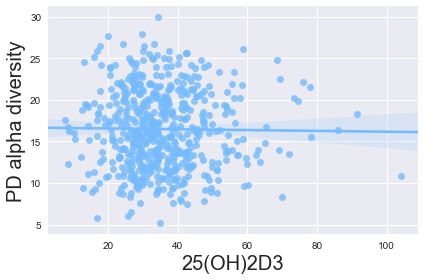

In [23]:
i = 0
col_list_palette = sns.xkcd_palette(['sky blue'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i],data=df)
ax.set_xlabel('25(OH)2D3', fontsize=20)
ax.set_ylabel('PD alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_VD3_reg.pdf')
ax.savefig('../figures/PD_VD3_reg.png')

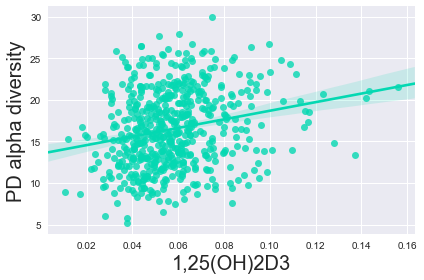

In [24]:
i = 1
col_list_palette = sns.xkcd_palette(['aquamarine'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i],data=df)
ax.set_xlabel('1,25(OH)2D3', fontsize=20)
ax.set_ylabel('PD alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_V1D3_reg.pdf')
ax.savefig('../figures/PD_V1D3_reg.png')

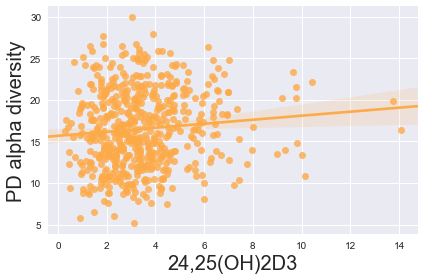

In [25]:
i = 2
col_list_palette = sns.xkcd_palette(['light orange'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i],data=df)
ax.set_xlabel('24,25(OH)2D3', fontsize=20)
ax.set_ylabel('PD alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_V24D3_reg.pdf')
ax.savefig('../figures/PD_V24D3_reg.png')

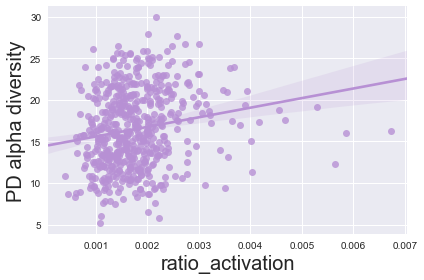

In [26]:
i = 3
col_list_palette = sns.xkcd_palette(['pale purple'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i],data=df)
ax.set_xlabel(var[i], fontsize=20)
ax.set_ylabel('PD alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_RatioAct_reg.pdf')
ax.savefig('../figures/PD_RatioAct_reg.png')

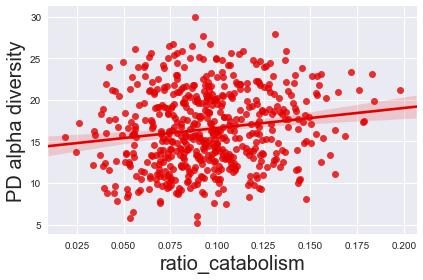

In [27]:
i = 4
col_list_palette = sns.xkcd_palette(['red'])
sns.set_palette(col_list_palette)
ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i],data=df)
ax.set_xlabel(var[i], fontsize=20)
ax.set_ylabel('PD alpha diversity', fontsize=20)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_RatioCat_reg.pdf')
ax.savefig('../figures/PD_RatioCat_reg.png')

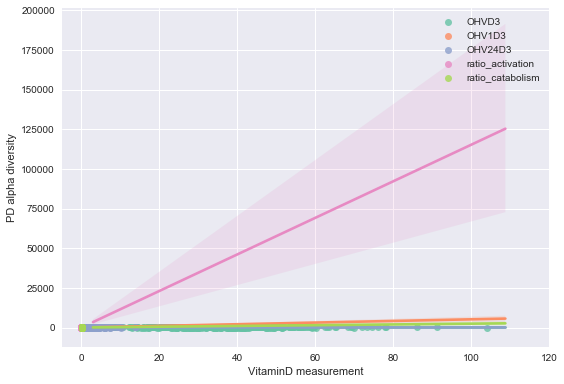

In [28]:
# all 5 VitD measurements 
sns.set(color_codes=True)
var = df.columns.drop('alpha_pd')
sns.set_palette("Set2", n_colors=len(var))
for i in range(len(var)):
    ax = sns.regplot(x=var[i], y="alpha_pd", label=var[i], data=df)
ax.set(xlabel='VitaminD measurement', ylabel='PD alpha diversity')
ax.legend()
plt.xlim(-5, 120)

ax = ax.get_figure()
ax.tight_layout()
ax.savefig('../figures/PD_5VitD_reg.pdf')
ax.savefig('../figures/PD_5VitD_reg.png')

## III. linear regression of PD alpha diversity vs. 5 vitaminD measurements

In [29]:
out = []
for i in range(len(var)):
    tmp = df[['alpha_pd', var[i]]].dropna(axis=0, how='any')
    y = tmp['alpha_pd']
    X = tmp[var[i]]
    results = smf.OLS(y, sm.add_constant(X)).fit()
    #print(results.summary())
    
    # normality test
    name = ['Chi^2', 'Two-tail probability']
    test = sms.omni_normtest(results.resid)
    normtest = lzip(name, test)[1][1]
    
    # condition number
    cn = np.linalg.cond(results.model.exog)
    
    # heteroskedasticity tests (null: the residual variance does not depend on the variables in x)
    name = ['Lagrange multiplier statistic', 'p-value']
    test = sms.het_breuschpagan(results.resid, results.model.exog)
    heter = lzip(name, test)[1][1]
    
    # linearity test (null: is linear)
    name = ['t value', 'p value']
    test = sms.linear_harvey_collier(results)
    linear = lzip(name, test)[1][1]

    out.append(['alpha_pd', var[i], results.params[1], results.pvalues[1], 
                results.rsquared_adj, normtest, cn, heter, linear])
out = pd.DataFrame(out, columns=['y', 'X', 'slope', 'pvalue', 'adjusted R-square', 
                                 'norm test P-val', 'condition number', 'hetero test P-val', 'linear P-val'])
out

,y,X,slope,pvalue,adjusted R-square,norm test P-val,condition number,hetero test P-val,linear P-val
0,alpha_pd,OHVD3,-0.004865,7.607707e-01,-0.001637,6.808188e-07,112.280839,0.471899,0.578848
1,alpha_pd,OHV1D3,51.591946,1.428321e-07,0.046173,5.071045e-05,50.788391,0.884284,0.744596
2,alpha_pd,OHV24D3,0.241207,2.381868e-02,0.007254,6.347246e-06,8.684601,0.138322,0.945413
3,alpha_pd,ratio_activation,1152.072619,1.771088e-05,0.030987,3.180971e-06,1361.655743,0.256221,0.391792
4,alpha_pd,ratio_catabolism,24.079698,2.894969e-04,0.021692,9.228702e-06,33.923192,0.063342,0.846119


#### diagnostic results: only break the 'normality' asssumption; all else hold
This is not a concern, see here (https://stats.stackexchange.com/questions/75054/how-do-i-perform-a-regression-on-non-normal-data-which-remain-non-normal-when-tr)

#### Diagnostics Plots and Tests

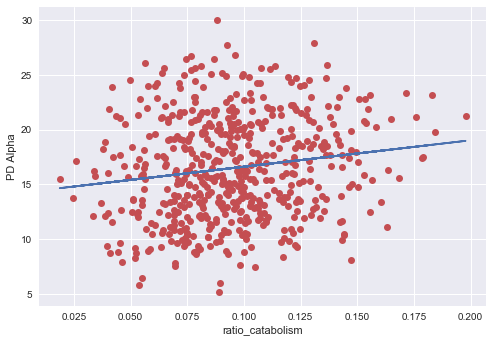

In [30]:
# plot the data and fit
plt.plot(X, y, 'ro')
plt.plot(X, results.fittedvalues, 'b')
plt.xlabel(var[i])
plt.ylabel('PD Alpha')

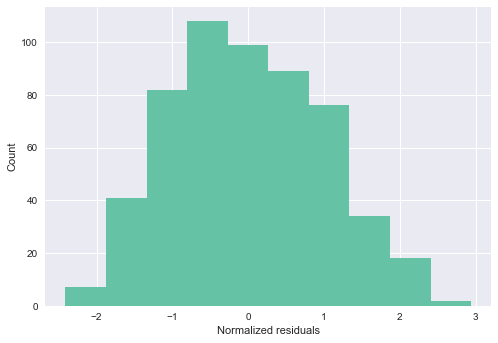

In [31]:
# histogram of normalized residuals
plt.hist(results.resid_pearson)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

In [32]:
# normality of residual tests
# Jarque-Bera test
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
print(lzip(name, test))

# Omni test
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
print(lzip(name, test))

[('Jarque-Bera', 13.266285142902351), ('Chi^2 two-tail prob.', 0.0013160208911760518), ('Skew', 0.21263565945227517), ('Kurtosis', 2.374068927781114)]
[('Chi^2', 23.186384354366623), ('Two-tail probability', 9.2287017281316676e-06)]


<Container object of 3 artists>

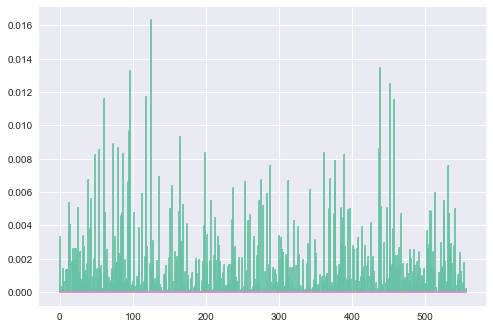

In [33]:
# cooks distance
influence = results.get_influence()
(c, p) = influence.cooks_distance # c is the distance and p is p-value
plt.stem(np.arange(len(c)), c, markerfmt=',')

In [34]:
# influence test
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(results)
test_class.dfbetas[:5,:]

array([[ 0.06951663, -0.05370485],
       [-0.00231121, -0.00275754],
       [ 0.02167332, -0.0173622 ],
       [-0.00982712,  0.00656197],
       [ 0.00238826, -0.00668517]])

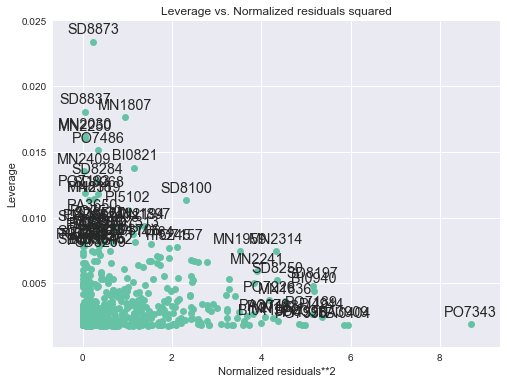

In [35]:
# residuals against leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [36]:
# multicolinearity
np.linalg.cond(results.model.exog) # condition number

33.923191966589435

In [37]:
# heteroskedasticity tests (whether residuals have unequal variance)
# Breush-Pagan test
name = ['Lagrange multiplier statistic', 'p-value'
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
print(lzip(name, test))

# Goldfeld-Quand test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 3.4476411016500679), ('p-valuef-value', 0.06334211022670018), ('f p-value', 3.4566736338293191)]
[('F statistic', 0.97237458203175153), ('p-value', 0.59192078475013821)]


In [38]:
# linearity test
name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', 0.19416448878664003), ('p value', 0.84611851987307118)]